In [1]:
# 테스트 libary
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from pandas_datareader import data
import matplotlib.pyplot as plt

# 차트 한글깨짐 방지
import matplotlib as mp
mp.rcParams['font.family'] = 'Malgun Gothic'
mp.rcParams['axes.unicode_minus'] = False

In [19]:
df1 = pd.read_csv("data/2014년 졸음운전 교통사고.csv", encoding='euc-kr')
df2 = pd.read_csv("data/2015년 졸음운전 교통사고.csv", encoding='euc-kr')
df3 = pd.read_csv("data/2016년 졸음운전 교통사고.csv", encoding='euc-kr')

In [20]:
# [문제-01] 3개의 데이터프레임을 하나로 합치시오.
df = pd.concat([df1,df2,df3]) # 데이터프레임 합치기
df.head(2)

,구분,사고(건),사망(명),부상(명)
0,2014년1월,169,7,347
1,2014년2월,145,3,268


In [24]:
# [문제-02] 년도, 월별 컬럼을 추가하고 구분 컬럼을 삭제 후 출력 하시오.
df['년도'] = df['구분'].str[0:5]
df['월'] = df['구분'].str[5:]
df.drop(columns=['구분'], inplace=True)
df.head(2)

,사고(건),사망(명),부상(명),년도,월
0,169,7,347,2014년,1월
1,145,3,268,2014년,2월


In [26]:
# [문제-03] 컬럼 순서를 변경 후 출력하시오. 정렬 => 년도, 월, 사고(건), 사망(명), 부상(명)
df = df[['년도','월','사고(건)','사망(명)','부상(명)']]
df.head(2)

,년도,월,사고(건),사망(명),부상(명)
0,2014년,1월,169,7,347
1,2014년,2월,145,3,268


In [28]:
# [문제-04] 멀티인덱스로 년도, 월 지정 후 출력하시오.
df.set_index(['년도','월'], inplace=True)
df.head(2)

사고(건)  사망(명)  부상(명)
년도    월                      
2014년 1월    169      7    347
      2월    145      3    268

In [34]:
# [문제-05] 년도 및 월별 평균 사망자 출력하시오.
df.groupby(by=['년도','월'], sort=False).mean().filter(['사망(명)'])

사망(명)
년도    월         
2014년 1월     7.0
      2월     3.0
      3월    12.0
      4월     4.0
      5월    17.0
      6월    13.0
      7월    14.0
      8월     9.0
      9월    15.0
      10월   14.0
      11월   10.0
      12월   12.0
2015년 1월     8.0
      2월     8.0
      3월     4.0
      4월    10.0
      5월     9.0
      6월     8.0
      7월     7.0
      8월    19.0
      9월    10.0
      10월   14.0
      11월    3.0
      12월    8.0
2016년 1월     5.0
      2월     6.0
      3월     7.0
      4월     7.0
      5월    13.0
      6월    12.0
      7월     9.0
      8월     7.0
      9월    13.0
      10월   10.0
      11월    5.0
      12월    4.0

In [39]:
# [문제-06] 2016년 사고대비 사망율을 보여 주시오.
df1 = df.loc['2016년']
df1['사망률'] = round(df1['사망(명)'] / df1['사고(건)'] * 100, 2)
df1

,사고(건),사망(명),부상(명),사망률
월,,,,
1월,192,5,387,2.60
2월,174,6,328,3.45
3월,217,7,435,3.23
4월,216,7,419,3.24
5월,239,13,522,5.44
6월,200,12,362,6.00
7월,227,9,460,3.96
8월,230,7,490,3.04
9월,187,13,347,6.95


<AxesSubplot:title={'center':'사망차트'}, xlabel='월'>

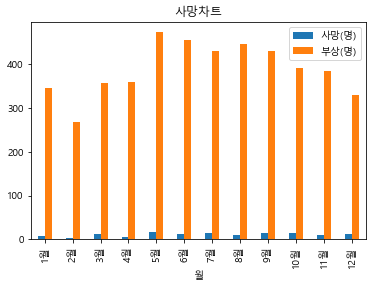

In [45]:
# [문제-07] 2014년 월별 사망, 부상 데이터를 바차트로 출력하시오.
df.loc['2014년'].plot(kind='bar', y=['사망(명)', '부상(명)'], title='사망차트')

In [49]:
# [문제-8] 2015년 대비 사망이 가장 많이 증가한 2016년도 월을 구하시오.
df5 = df.loc['2015년']
df6 = df.loc['2016년']
sr = df6['사망(명)'] - df5['사망(명)'] # Series
pd.DataFrame(sr[ sr==sr.max() ].index)

,월
0,5월
1,6월
